In [1]:
import os
import io
import gzip
import tarfile
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter
import fastavro

from astropy.time import Time
from astropy.io import fits
import astropy.units as u
import aplpy
%matplotlib inline

from alert_tools.tools import get_dcmag, make_dataframe
import sys


avro files provided in alert_tools repo: <br>
* ztf_public_20181215_713402105715010000 = ampi>1
* ztf_public_20190708_918339430315010127 = ampli<1

* ztf_public_20190519_868163810515010001 = nan? kernel crash <br><br>
To read .avrofile:

In [2]:
fname = 'D:/@Seattle/data/ztf_public_20181215/713402105715010000.avro'

with open(fname,'rb') as f:
    freader = fastavro.reader(f)
    schema = freader.writer_schema
    for packet in freader:
        dflc=make_dataframe(packet)


In [3]:
dflc

,aimage,aimagerat,bimage,bimagerat,candid,chinr,chipsf,classtar,clrcoeff,clrcounc,...,sumrat,szmag1,szmag2,szmag3,tblid,tooflag,xpos,ypos,zpclrcov,zpmed
0,0.823,0.279932,0.719,0.244558,713402105715010000,1.054,1.468926,0.983,-0.013589,0.00062,...,1.000000,11.236,-999.0,13.6511,0.0,0.0,1954.667847,555.512085,-0.000427,22.9485
1,1.029,0.312766,0.929,0.282371,713402105715010000,1.054,24.679100,0.984,NaN,NaN,...,1.000000,NaN,NaN,NaN,10.0,NaN,1965.989990,557.122986,NaN,NaN
2,0.944,0.330070,0.933,0.326224,713402105715010000,0.872,28.085199,0.989,NaN,NaN,...,1.000000,NaN,NaN,NaN,59.0,NaN,1221.420044,2487.129883,NaN,NaN
3,0.793,0.246273,0.551,0.171118,713402105715010000,3.089,3.338970,0.958,NaN,NaN,...,1.000000,NaN,NaN,NaN,1.0,NaN,1218.760010,2471.179932,NaN,NaN
4,0.794,0.205699,0.703,0.182124,713402105715010000,0.836,1.130530,0.949,NaN,NaN,...,0.973854,NaN,NaN,NaN,26.0,NaN,1969.069946,541.872009,NaN,NaN
5,0.773,0.323431,0.741,0.310042,713402105715010000,0.872,28.061800,0.984,NaN,NaN,...,0.994000,NaN,NaN,NaN,23.0,NaN,1219.410034,2480.239990,NaN,NaN
6,0.763,0.431073,0.675,0.381356,713402105715010000,1.054,98.106102,0.983,NaN,NaN,...,1.000000,NaN,NaN,NaN,9.0,NaN,1973.359985,548.159973,NaN,NaN
7,0.676,0.308676,0.635,0.289954,713402105715010000,1.244,6.200150,0.981,NaN,NaN,...,1.000000,NaN,NaN,NaN,11.0,NaN,2860.399902,2372.149902,NaN,NaN
8,0.691,0.300435,0.672,0.292174,713402105715010000,0.872,187.397003,1.000,NaN,NaN,...,1.000000,NaN,NaN,NaN,32.0,NaN,1229.420044,2476.520020,NaN,NaN
9,0.613,0.364881,0.543,0.323214,713402105715010000,1.054,166.160004,0.990,NaN,NaN,...,0.986034,NaN,NaN,NaN,6.0,NaN,1973.270020,545.838989,NaN,NaN


C:\Users\Mikha_PC\Anaconda3\lib\site-packages\alert_tools\tools.py:42: RuntimeWarning: invalid value encountered in log10
  dflc['dc_mag'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) + dflc['sign'] * 10**(-0.4*dflc['magpsf']))   #u
C:\Users\Mikha_PC\Anaconda3\lib\site-packages\alert_tools\tools.py:47: RuntimeWarning: invalid value encountered in log10
  dflc['dc_mag_llim'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) - 10**(-0.4*dflc['diffmaglim']))   #v2


Max: 17.144800186157227
Min: 14.76830005645752
Amplitude: 2.376500129699707
Is amplitude > 1.0 mag? True
Max: 17.144800186157227
Min: 14.76830005645752
Amplitude: 2.376500129699707
Is amplitude > 1.0 mag? True
Plot data? Y/N:Y


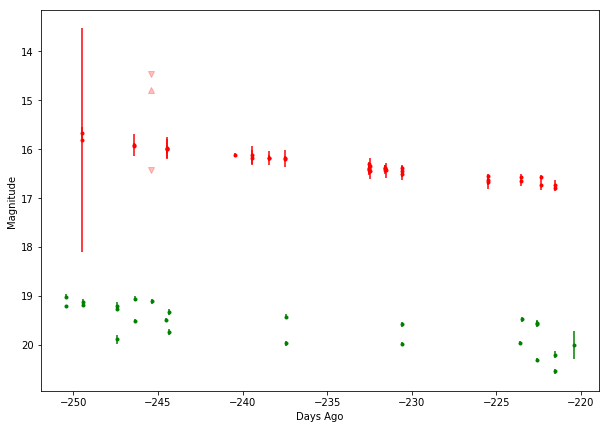

In [4]:
get_dcmag(dflc)